<a href="https://colab.research.google.com/github/shiny880410/helloworld/blob/master/final/files/%E6%95%A3%E4%BD%88%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  #f_.GetContentFile(fname)
!ls "/root/data"
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from IPython.display import Image
from wordcloud import WordCloud, ImageColorGenerator
import re
import jieba
import time
import math
from collections import Counter
import codecs
import sys
from google.colab import files
gc = gspread.authorize(GoogleCredentials.get_application_default())


     |████████████████████████████████| 993kB 2.7MB/s 
title: 散佈圖.ipynb, id: 1vogAJX-P6nbf0C0ZfdcE1IY9jC3ZsBuq
downloading to /content/散佈圖.ipynb
title: datascience final, id: 1ACNaFULWc7k1iO9GCjpcKbu3RB0O81z2xHdDfjymZeM
downloading to /content/datascience final
title: 長條圖.ipynb, id: 1F3u3VNoNJBCWjd6W5VxKUl7Ou2i1fX_j
downloading to /content/長條圖.ipynb
title: trainingdata, id: 1_L_CG5WhF5oZUvpmJTWEbEmHHGJ1-boQ9oxyfILFJyU
downloading to /content/trainingdata
title: downloadcsv.ipynb, id: 1NQ4WSMFcQWZ8BlAJJUEcYPd-sV7XA_Gk
downloading to /content/downloadcsv.ipynb
title: linePlots.ipynb, id: 1-m9LEIK5RHWw6gVtKNfuecEbUJbxsBvh
downloading to /content/linePlots.ipynb
title: 圖檔, id: 1uMB-dHHKMIqa78hvgR-oCn13y3h4G6cv
downloading to /content/圖檔
title: 107年-臺北市A1及A2類交通事故明細, id: 1A3V6ncj7VLNDiDkchaYPIYmqrA0trkEj8L-tHoaAyZs
downloading to /content/107年-臺北市A1及A2類交通事故明細
title: Zhongxiao.ipynb, id: 1Goo9dpbDHh_1OVHwBEnPagQxAy1vluVV
downloading to /content/Zhongxiao.ipynb
title:  Fuxing.ipynb, id: 17FxY-


*   畫車流-車速-密度，三者的關係圖。
*   匯入第一份資料，用get_as_dataframe，轉成Dataframe處理



In [0]:
from gspread_dataframe import get_as_dataframe, set_with_dataframe
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_L_CG5WhF5oZUvpmJTWEbEmHHGJ1-boQ9oxyfILFJyU/edit#gid=0')
wks4 = sh.worksheet("xydata")

df = get_as_dataframe(wks4,parse_dates=True,usecols=[0,1,2,3],header=None)
dff = df.drop(df.index[0]) #第一row是標題(string)，刪掉第一row

密度-速率圖

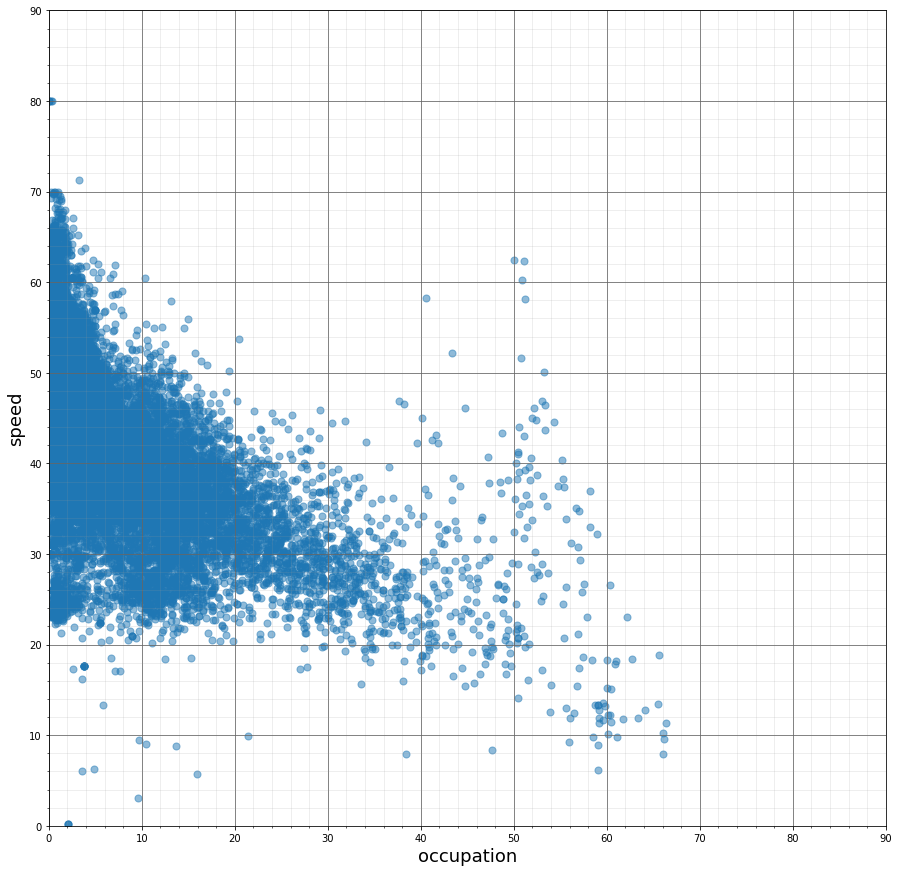

In [0]:
#設定圖片尺寸，x-y座標
plt.figure(figsize=(15,15))
plt.xlim((0, 90))
plt.ylim((0, 90))
plt.xlabel('occupation', fontsize=18)
plt.ylabel('speed', fontsize=18)
#設定粗細網格線
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#畫圖、存檔
plt.scatter(dff[2], dff[1],s=50, alpha=.5)
plt.savefig("密度-速率.png")
files.download("密度-速率.png")
plt.show()

流量-密度圖

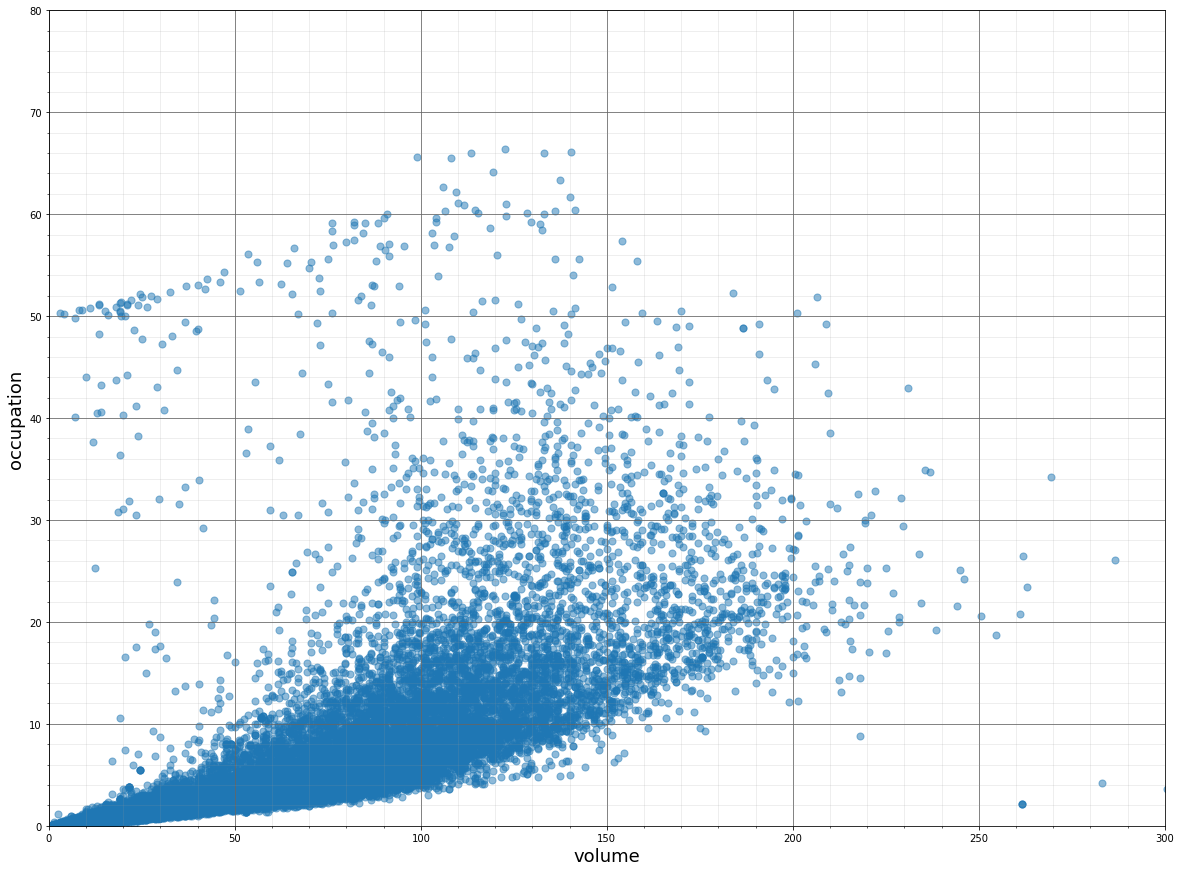

In [0]:
plt.figure(figsize=(20,15))
plt.xlim((0, 300))
plt.ylim((0, 80))
plt.xlabel('volume', fontsize=18)
plt.ylabel('occupation', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(dff[3], dff[2],s=50, alpha=.5)
plt.savefig("流量-密度.png")
files.download("流量-密度.png")
plt.show()


密度-流量圖

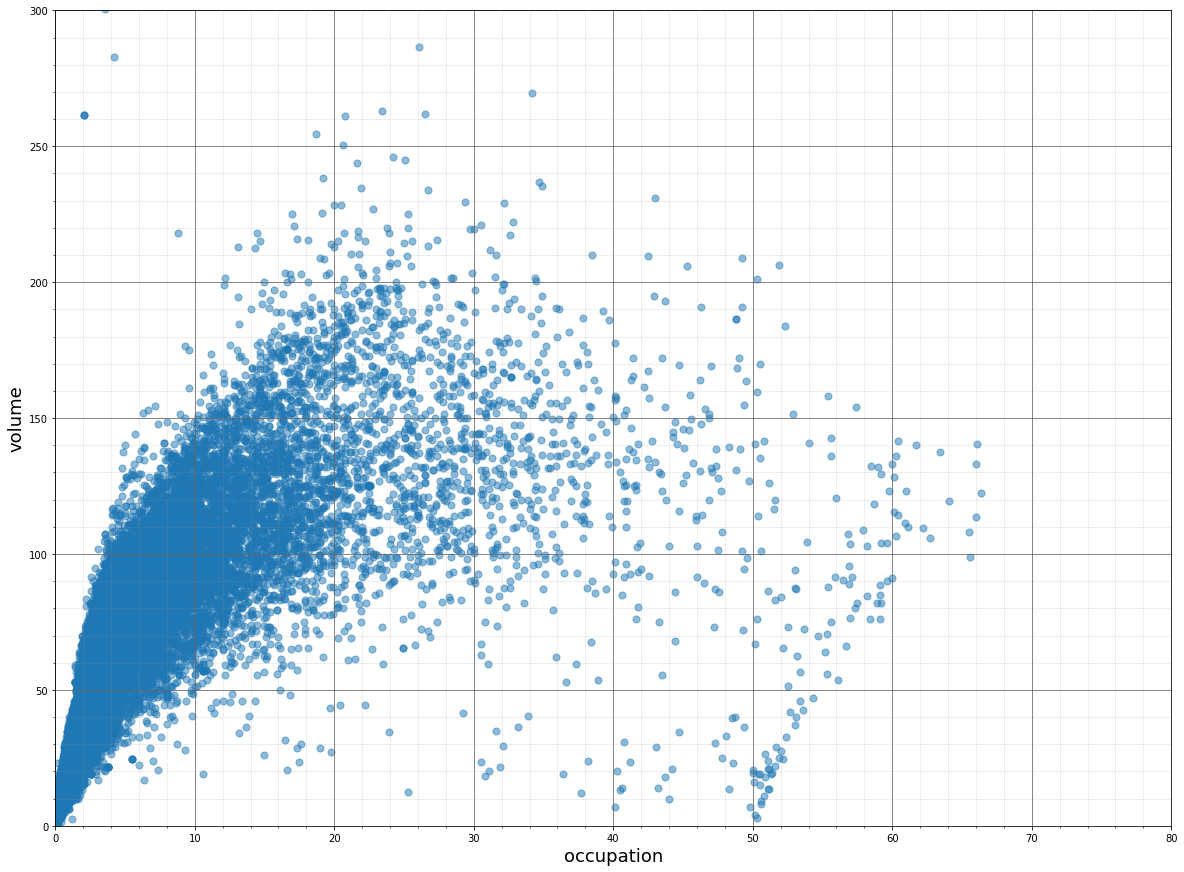

In [0]:
plt.figure(figsize=(20,15))
plt.ylim((0, 300))
plt.xlim((0, 80))
plt.ylabel('volume', fontsize=18)
plt.xlabel('occupation', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(dff[2], dff[3],s=50, alpha=.5)
plt.savefig("密度-流量.png")
files.download("密度-流量.png")
plt.show()


* 第二份資料比較麻煩，因為資料為試算表算出來的，無法直接用get_as_dataframe
* 先匯入成list，並把資料格式轉成float，其中兩項資料在轉換時遇到很多問題，所以那兩項再分別轉dataframe處理
* 接下來就是用一樣的繪圖上把圖畫完

In [0]:
sh2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_L_CG5WhF5oZUvpmJTWEbEmHHGJ1-boQ9oxyfILFJyU/edit#gid=448064943')
wks5 = sh2.worksheet("工作表2")
#df2 = get_as_dataframe(wks5,parse_dates=True,usecols=[0,1,2,3],header=None)
#df2.head()
#試算表算出來的無法使用get_as_dataframe
pi1 = wks5.col_values(1)
pi3 = wks5.col_values(2)
pi4 = wks5.col_values(3)
srpi3 = wks5.col_values(5)
srpi4recip = wks5.col_values(6)

#print(type(pi1[2])) --> 原本的資料是str
#轉str，順便去除第一格的標題
pi1 = list(map(float, pi1[1:]))
pi3 = list(map(float, pi3[1:]))
srpi3 = srpi3[1:len(pi1)+1]
srpi3 = list(map(float, srpi3))




In [0]:
#pi4可能部分資料有小問題，轉換不了，改成dataframe處理
pi4=pi4[1:]
dfpi4 = pd.DataFrame(pi4)
dfpi4.head()
dfpi4[0][1]
dfpi4[0] = dfpi4[0].astype(float)
dfpi4[0][1]  #確認一下資料是對的


0.0001412926567

In [0]:
#sqrt_1/4pi跟pi4一樣，獨自拿出來處理
srpi4re=srpi4recip[1:]
dfsrpi4re=pd.DataFrame(srpi4re)
dfsrpi4re[0] = dfsrpi4re[0].astype(float)
dfsrpi4re.head()  #一樣確認一下轉換後的資料仍是對齊的

,0
0,134.358805
1,84.127930
2,83.573221
3,143.507630
4,48.405787


pi3-pi1圖

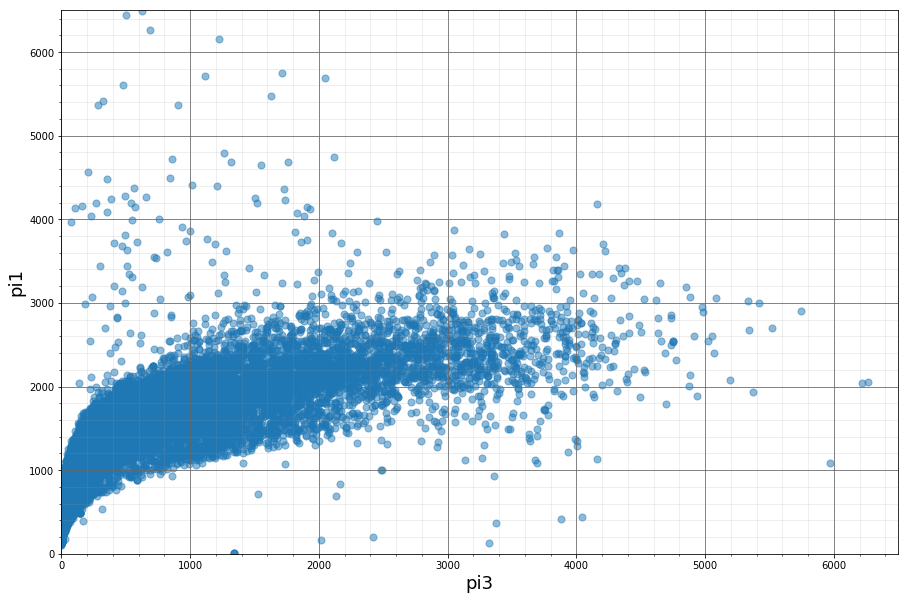

In [0]:
plt.figure(figsize=(15,10))
plt.ylim((0, 6500))
plt.xlim((0, 6500))
plt.ylabel('pi1', fontsize=18)
plt.xlabel('pi3', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(pi3,pi1,s=50, alpha=.5)
plt.savefig("pi3-pi1.png")
files.download("pi3-pi1.png")
plt.show()



sqrt(pi3)-pi1圖

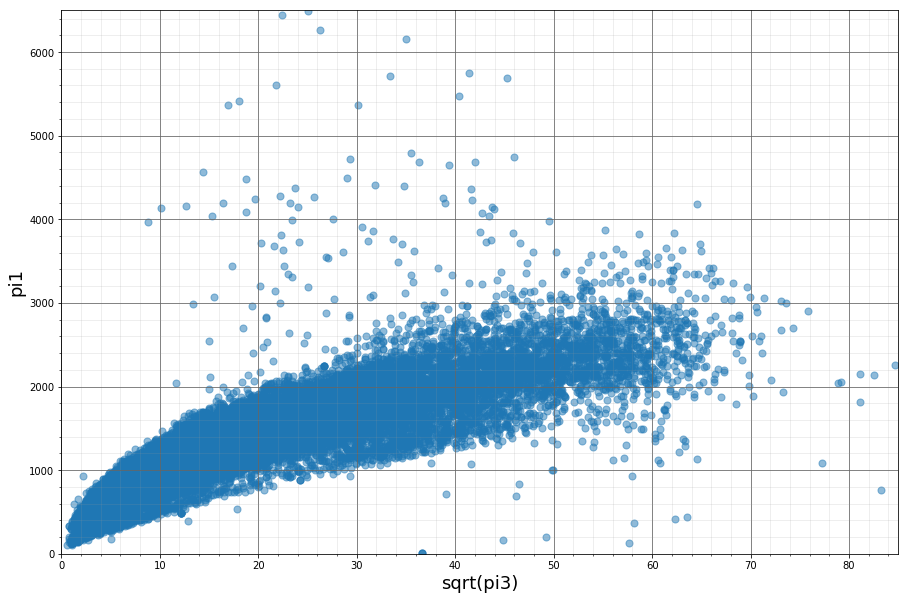

In [0]:
plt.figure(figsize=(15,10))
plt.ylim((0, 6500))
plt.xlim((0, 85))
plt.ylabel('pi1', fontsize=18)
plt.xlabel('sqrt(pi3)', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(srpi3,pi1,s=50, alpha=.5)
plt.savefig("sqrt_pi3-pi1.png")
files.download("sqrt_pi3-pi1.png")
plt.show()


pi4-pi1圖

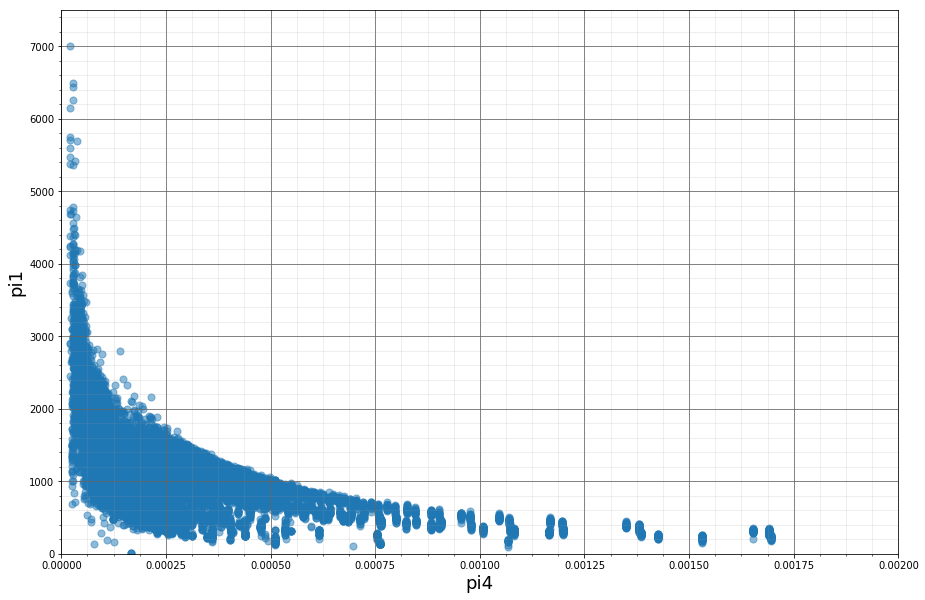

In [0]:
#x-y : pi4-pi1
plt.figure(figsize=(15,10))
plt.ylim((0, 7500))
plt.xlim((0, 0.002))
plt.ylabel('pi1', fontsize=18)
plt.xlabel('pi4', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(dfpi4[0],pi1,s=50, alpha=.5)

plt.savefig("pi4-pi1.png")
files.download("pi4-pi1.png")
plt.show()


sqrt(1/pi4)-pi1圖

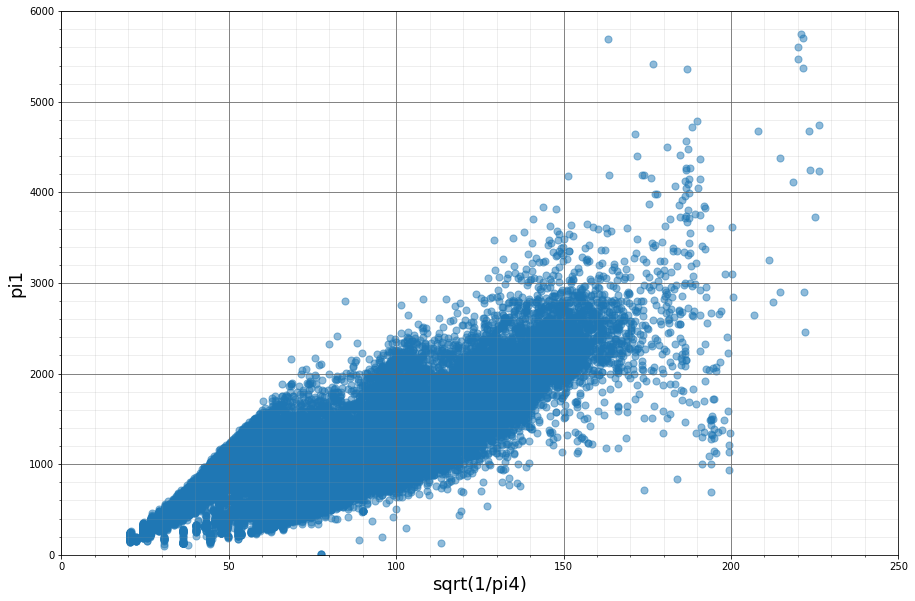

In [0]:
plt.figure(figsize=(15,10))
plt.ylim((0, 6000))
plt.xlim((0, 250))
plt.ylabel('pi1', fontsize=18)
plt.xlabel('sqrt(1/pi4)', fontsize=18)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.scatter(dfsrpi4re[0],pi1,s=50, alpha=.5)
plt.savefig("sqrt_pi4^-1-pi1.png")
files.download("sqrt_pi4^-1-pi1.png")
plt.show()
